# Ejercicios ensembling
En este ejercicio vas a realizar prediciones sobre un dataset de ciudadanos indios diabéticos. Se trata de un problema de clasificación en el que intentaremos predecir 1 (diabético) 0 (no diabético).

### 1. Carga las librerías que consideres comunes al notebook

In [2]:
!pip install numpy pandas scikit-learn xgboost


In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier
)

from xgboost import XGBClassifier


In [4]:
df = pd.read_csv("data/diabetes.csv")

print("Shape:", df.shape)
display(df.head())

print("\nTipos de dato:")
print(df.dtypes)

print("\nMissings por columna:")
print(df.isna().sum())


FileNotFoundError: [Errno 2] No such file or directory: 'data/diabetes.csv'

### 2. Lee los datos de [esta direccion](https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv)
Los nombres de columnas son:
```Python
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
```

In [5]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

df = pd.read_csv(url, header=None, names=names)

print(df.shape)
df.head()

(768, 9)


,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
# obtén información del dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    768 non-null    int64  
 1   plas    768 non-null    int64  
 2   pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   test    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
# estadísticos descriptivos

df.describe()

,preg,plas,pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


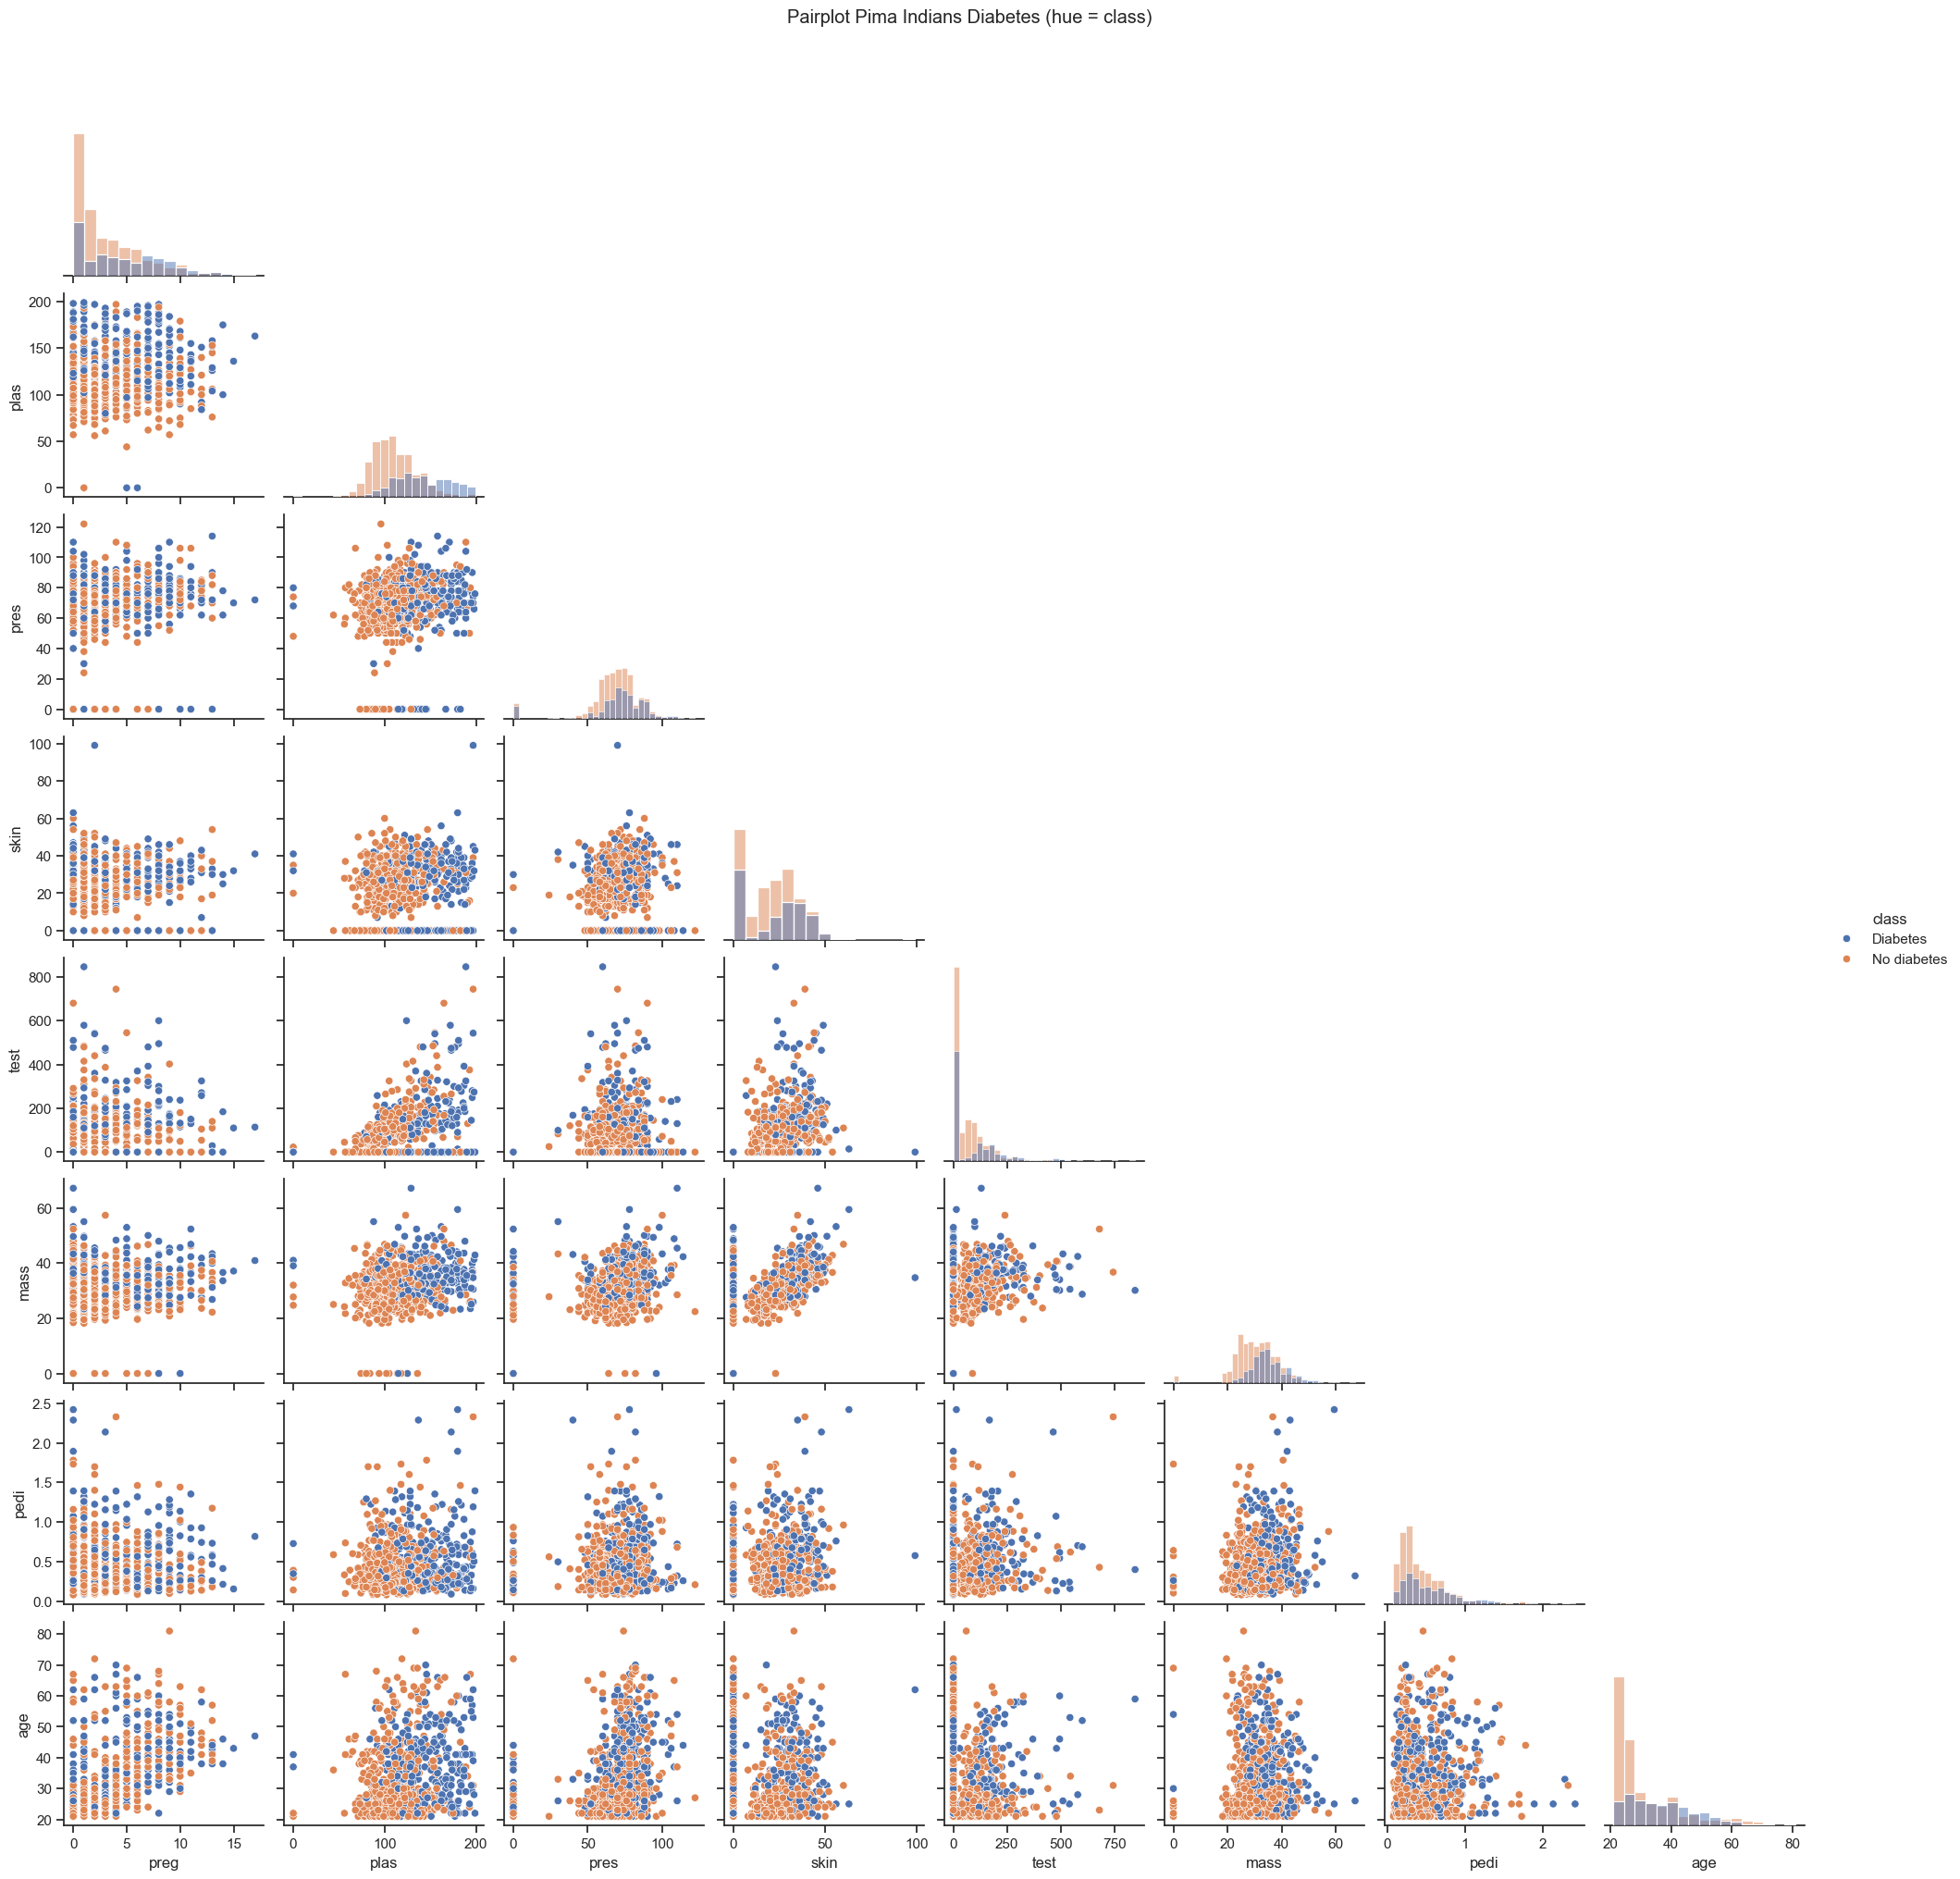

In [ ]:
df_plot = df.copy()


g = sns.pairplot(
    df_plot,
    hue="class",
    diag_kind="hist",
    corner=True      
)
g.fig.suptitle("Pairplot Pima Indians Diabetes (hue = class)", y=1.02)

plt.show()



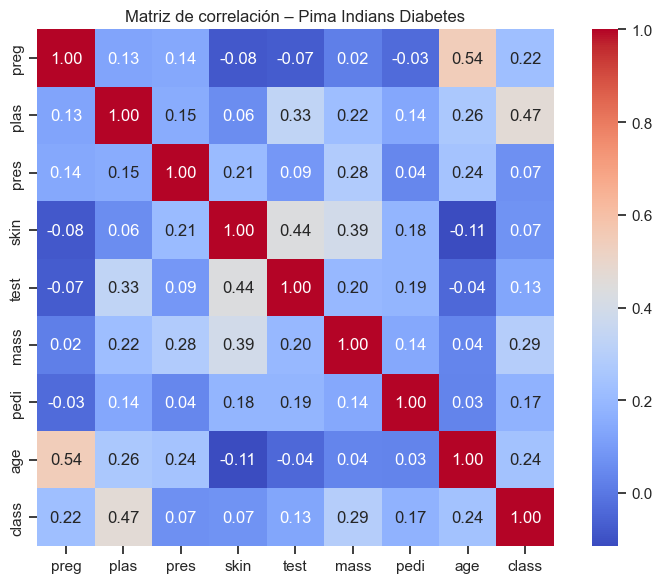

In [13]:
# haz un heatmap con la correlación, muestra los datos en las cajitas

corr = df.corr(numeric_only=True)

plt.figure(figsize=(8, 6))
sns.heatmap(
    corr,
    annot=True,      
    fmt=".2f",       
    cmap="coolwarm",
    square=True)

plt.title("Matriz de correlación – Pima Indians Diabetes")
plt.tight_layout()
plt.show()

In [14]:
# haz un value counts de la clase normalizado
df["class"].value_counts(normalize=True)

class
0    0.651042
1    0.348958
Name: proportion, dtype: float64

### 3. Bagging
Para este apartado tendrás que crear un ensemble utilizando la técnica de bagging ([BaggingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html)), mediante la cual combinarás 100 [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html). Recuerda utilizar también [cross validation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html) con 10 kfolds.

**Para este apartado y siguientes, no hace falta que dividas en train/test**, por hacerlo más sencillo. Simplemente divide tus datos en features y target.

Establece una semilla

In [15]:
# define la X, la y y la semilla
X = df.drop(columns=["class"])

y = df["class"]

seed = 1

print("Shape X:", X.shape)
print("Shape y:", y.shape)
print("Seed   :", seed)

Shape X: (768, 8)
Shape y: (768,)
Seed   : 1


In [16]:
# importa el árbol de clasificación, un clasificador de tipo bagging y un kfold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import KFold, cross_val_score


In [17]:
# haz un árbol de clasificación con profundidad 5
# haz un bagging classifier con ese tipo de árbol y 100 estimadores
dt = DecisionTreeClassifier(
    max_depth=5,
    random_state=seed)

bag_model = BaggingClassifier(
    estimator=dt,        
    n_estimators=100,
    random_state=seed)

bag_model

,estimator,DecisionTreeC...andom_state=1)
,n_estimators,100
,max_samples,1.0
,max_features,1.0
,bootstrap,True
,bootstrap_features,False
,oob_score,False
,warm_start,False
,n_jobs,None
,random_state,1
,verbose,0


In [18]:
# usa KFold con 10 trozos
# mira en test qué índices tienen los trozos 


kf = KFold(
    n_splits=10,
    shuffle=True,
    random_state=seed  
)


for fold, (train_idx, test_idx) in enumerate(kf.split(X), start=1):
    print(f"Fold {fold}:")
    print("  Índices de test:", test_idx)
    print()

Fold 1:
  Índices de test: [  8  16  19  23  47  56  59  60  81  85  90 101 111 117 134 159 175 187
 202 218 224 233 238 277 285 286 299 311 334 335 341 349 352 355 371 385
 389 394 399 400 403 430 436 445 459 472 493 516 533 535 553 556 558 567
 577 581 590 591 614 620 628 637 640 667 679 680 689 699 711 726 742 750
 753 754 756 757 760]

Fold 2:
  Índices de test: [  0   3  35  41  50  57  61  65  66  69  74  84 104 108 120 135 148 154
 181 194 195 201 207 223 255 262 265 268 273 298 307 310 318 320 339 350
 358 378 382 392 411 428 437 442 448 452 463 502 507 521 527 530 538 539
 541 546 549 552 560 563 611 631 638 641 643 646 661 684 693 701 705 707
 722 733 747 755 765]

Fold 3:
  Índices de test: [ 11  13  14  17  34  40  45  68  76  82  92 103 107 114 118 119 132 139
 160 161 172 180 185 189 205 214 216 241 242 245 247 257 301 305 323 329
 331 353 354 366 372 373 375 396 402 404 408 422 426 432 449 480 483 496
 506 509 518 540 587 598 599 607 612 629 635 650 663 669 670 674 682 6

In [22]:
# haz un crossvalscore del bagging classifier con scoring de accuracy
# calcula la media y stdv del score
# Cross-validation con kfold explícito
scores = cross_val_score(
    bag_model,
    X,
    y,
    cv=kf,
    scoring="accuracy"
)

print(scores)
print(f"Accuracy media: {scores.mean():.4f}")
print(f"Desviación estándar: {scores.std():.4f}")



[0.81818182 0.81818182 0.79220779 0.7012987  0.81818182 0.71428571
 0.81818182 0.76623377 0.72368421 0.69736842]
Accuracy media: 0.7668
Desviación estándar: 0.0499


### 4. Random Forest
En este caso entrena un [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) con 100 árboles y un `max_features` de 3. También con validación cruzada

In [ ]:
# equivalente al apartado anterior, con máxima profundidad de 5

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score

X = df.drop("class", axis=1)
y = df["class"]
seed = 42


Hacemos RFores

In [25]:
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_features=3,
    random_state=seed,
    n_jobs=-1   
)

In [26]:
kf = KFold(
    n_splits=10,
    shuffle=True,
    random_state=seed
)

In [27]:
#cval score acc

scores_rf = cross_val_score(
    rf_model,
    X,
    y,
    cv=kf,
    scoring="accuracy"
)




In [28]:
print(scores_rf)          
print(scores_rf.mean())   
print(scores_rf.std())   


[0.72727273 0.77922078 0.74025974 0.85714286 0.84415584 0.72727273
 0.79220779 0.74025974 0.67105263 0.81578947]
0.7694634313055365
0.05565587112247596


### 5. AdaBoost
Implementa un [AdaBoostClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html) con 30 árboles.

In [ ]:
# equivalente al anterior con 30 estimadores

In [29]:
X = df.drop("class", axis=1)
y = df["class"]
seed = 42


In [30]:

base_tree = DecisionTreeClassifier(
    max_depth=1,
    random_state=seed
)


In [31]:
ada_model = AdaBoostClassifier(
    estimator=base_tree,   
    n_estimators=30,      
    learning_rate=1.0,
    random_state=seed
)

In [32]:
kf = KFold(
    n_splits=10,
    shuffle=True,
    random_state=seed
)

In [33]:
scores_ada = cross_val_score(
    ada_model,
    X,
    y,
    cv=kf,
    scoring="accuracy"
)

In [35]:
print(scores_ada)           
print(scores_ada.mean())     
print(scores_ada.std()) 

[0.74025974 0.79220779 0.72727273 0.77922078 0.83116883 0.67532468
 0.79220779 0.77922078 0.68421053 0.81578947]
0.7616883116883117
0.050336101925772855


### 6. GradientBoosting
Implementa un [GradientBoostingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html) con 100 estimadores

In [ ]:
# equivalente al anterior

In [36]:
gb_model = GradientBoostingClassifier(
    n_estimators=100,
    random_state=seed
)

In [37]:

kf = KFold(
    n_splits=10,
    shuffle=True,
    random_state=seed
)

In [38]:
scores_gb = cross_val_score(
    gb_model,
    X,
    y,
    cv=kf,
    scoring="accuracy"
)

In [39]:
print(scores_gb)          
print(scores_gb.mean())  
print(scores_gb.std())  

[0.72727273 0.79220779 0.74025974 0.85714286 0.81818182 0.72727273
 0.81818182 0.74025974 0.65789474 0.77631579]
0.765498974709501
0.05527669626375457


### 7. XGBoost
Para este apartado utiliza un [XGBoostClassifier](https://docs.getml.com/latest/api/getml.predictors.XGBoostClassifier.html) con 100 estimadores. XGBoost no forma parte de la suite de modelos de sklearn, por lo que tendrás que instalarlo con pip install

In [40]:
!pip install xgboost

In [41]:
xgb_model = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    subsample=1.0,
    colsample_bytree=1.0,
    random_state=seed,
    n_jobs=-1,
    eval_metric="logloss"   
)

In [42]:
kf = KFold(
    n_splits=10,
    shuffle=True,
    random_state=seed
)

In [43]:
scores_xgb = cross_val_score(
    xgb_model,
    X,
    y,
    cv=kf,
    scoring="accuracy"
)

In [44]:
# equivalente al anterior
print(scores_xgb)           
print(scores_xgb.mean())    
print(scores_xgb.std())   

[0.68831169 0.79220779 0.72727273 0.85714286 0.83116883 0.71428571
 0.80519481 0.72727273 0.69736842 0.81578947]
0.7656015037593985
0.058029492365922364


### 8. Primeros resultados
Crea un dataframe con los resultados y sus algoritmos, ordenándolos de mayor a menor

In [ ]:
pd.options.display.float_format = "{:.6f}".format  

mean_scores = {
    "Bag": scores_bag.mean(),
    "RF":  scores_rf.mean(),
    "AB":  scores_ada.mean(),
    "GB":  scores_gb.mean(),
    "XGB": scores_xgb.mean()
}

cv_results = pd.DataFrame.from_dict(
    mean_scores,
    orient="index",
    columns=["cv_mean_acc"]
)

cv_results = cv_results.sort_values("cv_mean_acc", ascending=False)

display(cv_results)


,cv_mean_acc
RF,0.769463
XGB,0.765602
GB,0.765499
Bag,0.764183
AB,0.761688


### 9. Hiperparametrización
Vuelve a entrenar los modelos de nuevo, pero esta vez dividiendo el conjunto de datos en train/test y utilizando un gridsearch para encontrar los mejores hiperparámetros.

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(614, 8)
(154, 8)
(614,)
(154,)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


rf_model = RandomForestClassifier(
    n_estimators=100,
    max_features=3,
    random_state=seed,
    n_jobs=-1
)


rf_model.fit(X_train, y_train)


y_pred = rf_model.predict(X_test)


acc = accuracy_score(y_test, y_pred)

In [ ]:
print(f"{acc:.4f}\n")


print(classification_report(y_test, y_pred, digits=4))

print(confusion_matrix(y_test, y_pred))


0.7597

              precision    recall  f1-score   support

           0     0.8298    0.7879    0.8083        99
           1     0.6500    0.7091    0.6783        55

    accuracy                         0.7597       154
   macro avg     0.7399    0.7485    0.7433       154
weighted avg     0.7656    0.7597    0.7619       154

[[78 21]
 [16 39]]


In [56]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

df = pd.read_csv(url, header=None, names=names)

X = df.drop("class", axis=1)
y = df["class"]

seed = 42
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=seed
)


pipe_rf = Pipeline([
    ("scaler", StandardScaler()),
    ("rf", RandomForestClassifier(random_state=seed))
])

param_grid = {
    "rf__n_estimators":   [100, 200, 300, 450],
    "rf__max_depth":      [None, 5, 10],
    "rf__max_leaf_nodes": [None, 10, 20]
}

grid = GridSearchCV(
    estimator=pipe_rf,
    param_grid=param_grid,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)

grid.fit(X_train, y_train)

grid  


,estimator,Pipeline(step...m_state=42))])
,param_grid,"{'rf__max_depth': [None, 5, ...], 'rf__max_leaf_nodes': [None, 10, ...], 'rf__n_estimators': [100, 200, ...]}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,copy,True


In [12]:
print(grid.best_estimator_)
print(grid.best_params_)
print(grid.best_score_)


Pipeline(steps=[('scaler', StandardScaler()),
                ('rf',
                 RandomForestClassifier(max_depth=10, max_leaf_nodes=20,
                                        n_estimators=200, random_state=42))])
{'rf__max_depth': 10, 'rf__max_leaf_nodes': 20, 'rf__n_estimators': 200}
0.7817939490870318


In [21]:

y_pred = grid.predict(X_test)

print("Accuracy: ",  accuracy_score(y_test, y_pred))
print("Recall:   ",  recall_score(y_test, y_pred))
print("Precision:",  precision_score(y_test, y_pred))
print("ROC AUC:  ",  roc_auc_score(y_test, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy:  0.7467532467532467
Recall:    0.6363636363636364
Precision: 0.6481481481481481
ROC AUC:   0.7222222222222221
Confusion matrix:
 [[80 19]
 [20 35]]


In [29]:
from sklearn.model_selection import KFold, cross_val_score
grid_cv = cross_val_score(
    grid,   
    X,
    y,
    cv=grid,
    scoring="accuracy"
)

print(grid_cv)
print(grid_cv.mean())
print(grid_cv.std())


InvalidParameterError: The 'cv' parameter of cross_val_score must be an int in the range [2, inf), an object implementing 'split' and 'get_n_splits', an iterable or None. Got GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('rf',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'rf__max_depth': [None, 5, 10],
                         'rf__max_leaf_nodes': [None, 10, 20],
                         'rf__n_estimators': [100, 200, 300, 450]},
             scoring='accuracy') instead.

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score


gb_model = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    random_state=seed
)

gb_model.fit(X_train, y_train)


y_pred = gb_model.predict(X_test)


In [ ]:
print(f"Acc:  {accuracy_score(y_test, y_pred):.4f}")
print(f"ROC AUC:   {roc_auc_score(y_test, y_pred):.4f}")
print("\nClassification report:")
print(classification_report(y_test, y_pred, digits=4))
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))


Acc:  0.7403
ROC AUC:   0.7253

Classification report:
              precision    recall  f1-score   support

           0     0.8105    0.7778    0.7938        99
           1     0.6271    0.6727    0.6491        55

    accuracy                         0.7403       154
   macro avg     0.7188    0.7253    0.7215       154
weighted avg     0.7450    0.7403    0.7421       154

Matriz de confusión:
[[77 22]
 [18 37]]


In [32]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

acc = accuracy_score(y_test, y_pred)



In [ ]:
# equivalente

450

In [44]:
from itertools import product
import pandas as pd

from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


seed = 42

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=seed
)


n_estimators_list   = [100, 200, 300, 400, 450]
max_depth_list      = [None, 3, 5, 7]
max_leaf_nodes_list = [None, 10, 20]

best_acc = 0.0
best_params = None

for n_estimators, max_depth, max_leaf_nodes in product(
    n_estimators_list, max_depth_list, max_leaf_nodes_list
):
    rf = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        max_leaf_nodes=max_leaf_nodes,
        random_state=seed,
        n_jobs=-1
    )
    
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    
    print(
        f"max_depth={str(max_depth):>4}, "
        f"n_estimators={n_estimators:3d}, "
        f"max_leaf_nodes={str(max_leaf_nodes):>4} "
        f"accuracy={acc:.4f}"
    )
    
    if acc > best_acc:
        best_acc = acc
        best_params = {
            "n_estimators": n_estimators,   
            "max_depth": max_depth,
            "max_leaf_nodes": max_leaf_nodes
        }


pipe_rf = Pipeline([
    ("scaler", StandardScaler()),
    ("rf", RandomForestClassifier(random_state=seed))
])

param_grid = {
    "rf__n_estimators":   [100, 200, 300, 450],
    "rf__max_depth":      [None, 5, 10],
    "rf__max_leaf_nodes": [None, 10, 20]
}

grid = GridSearchCV(
    estimator=pipe_rf,
    param_grid=param_grid,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)

grid.fit(X_train, y_train)





max_depth=None, n_estimators=100, max_leaf_nodes=None accuracy=0.7208
max_depth=None, n_estimators=100, max_leaf_nodes=  10 accuracy=0.7792
max_depth=None, n_estimators=100, max_leaf_nodes=  20 accuracy=0.7468
max_depth=   3, n_estimators=100, max_leaf_nodes=None accuracy=0.7727
max_depth=   3, n_estimators=100, max_leaf_nodes=  10 accuracy=0.7597
max_depth=   3, n_estimators=100, max_leaf_nodes=  20 accuracy=0.7597
max_depth=   5, n_estimators=100, max_leaf_nodes=None accuracy=0.7662
max_depth=   5, n_estimators=100, max_leaf_nodes=  10 accuracy=0.7792
max_depth=   5, n_estimators=100, max_leaf_nodes=  20 accuracy=0.7662
max_depth=   7, n_estimators=100, max_leaf_nodes=None accuracy=0.7662
max_depth=   7, n_estimators=100, max_leaf_nodes=  10 accuracy=0.7792
max_depth=   7, n_estimators=100, max_leaf_nodes=  20 accuracy=0.7403
max_depth=None, n_estimators=200, max_leaf_nodes=None accuracy=0.7338
max_depth=None, n_estimators=200, max_leaf_nodes=  10 accuracy=0.7727
max_depth=None, n_es

,estimator,Pipeline(step...m_state=42))])
,param_grid,"{'rf__max_depth': [None, 5, ...], 'rf__max_leaf_nodes': [None, 10, ...], 'rf__n_estimators': [100, 200, ...]}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,copy,True


In [35]:
best_model = grid.best_estimator_          
y_pred = best_model.predict(X_test)

acc = accuracy_score(y_test, y_pred)

print(f"{acc:.4f}\n")                      

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.7468

              precision    recall  f1-score   support

           0       0.80      0.81      0.80        99
           1       0.65      0.64      0.64        55

    accuracy                           0.75       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.75      0.75      0.75       154

[[80 19]
 [20 35]]


In [ ]:

print(accuracy_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(roc_auc_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.7467532467532467
0.6363636363636364
0.6481481481481481
0.7222222222222221
[[80 19]
 [20 35]]


### 10. Conclusiones finales

Escogemos el modelo que mejor generalice, es decir, el que tenga mejor métrica ante test (RF hiperparametrizado)

In [ ]:
import pickle


modelo_final = grid.best_estimator_

with open("modelo_final.pkl", "wb") as f:
    pickle.dump(modelo_final, f)


In [46]:
with open("modelo_final.pkl", "rb") as f:
    modelo_importado = pickle.load(f)

In [47]:
modelo_importado

,steps,"[('scaler', ...), ('rf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,n_estimators,200
,criterion,'gini'
,max_depth,10
,min_samples_split,2


In [48]:
modelo_importado.predict([[10,10,10,10,10,10,10,10]])

c:\Users\Asus Vivobook\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([0])

In [53]:
rf = RandomForestClassifier(...)

rf.fit(X_train, y_train)
importancias = rf.feature_importances_
print(importancias)


InvalidParameterError: The 'n_estimators' parameter of RandomForestClassifier must be an int in the range [1, inf). Got Ellipsis instead.